## Sleep Tests

In [76]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams.update({'font.size': 14})
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 

In [3]:
def plot_hist(log,b=1000):
    with open(log) as f:
        lines = f.readlines()
        y = []
        for line in lines:
            y.append(float(line.split()[0]))

    #plt.xscale('log')
    plt.xlabel("t")
    plt.hist(y,bins=b,color="red")
    plt.show()

### Sleep 0.2

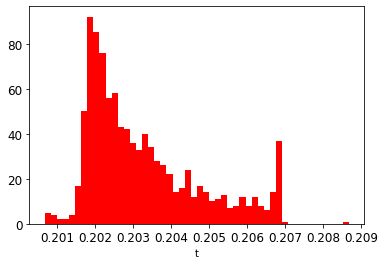

In [7]:
plot_hist("comparision_tests/logs/sleep_0.2.txt",50)

In [8]:
def plot_perf(log):
    with open(log) as f:
        lines = f.readlines()
        x = []
        y = []
        for line in lines:
            m = float(line.split()[0])
            time = float(line.split()[1])
            x.append(m)
            y.append(m/time)
            
    #plt.yscale('log')
    #plt.xscale('log')
    plt.xlabel("t")
    plt.ylabel("delta")
    plt.plot(x,y,'.',color='grey')

### Sleep 0.2 - 2

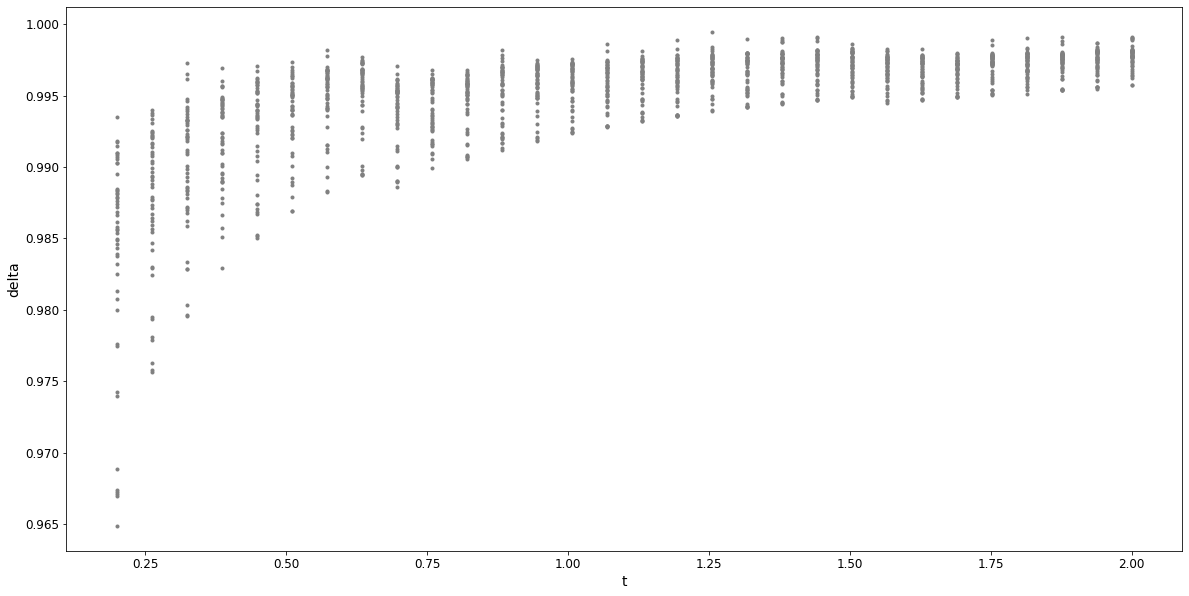

In [13]:
plt.rcParams["figure.figsize"] = (20,10)
plot_perf("comparision_tests/logs/sleep_multi.txt")

In [19]:
def plot_time(log):
    with open(log) as f:
        lines = f.readlines()
        x = []
        y = []
        for line in lines:
            m = float(line.split()[0])
            time = float(line.split()[1])
            x.append(m)
            y.append(time)
            
    #plt.yscale('log')
    #plt.xscale('log')
    plt.xlabel("t")
    plt.ylabel("delta")
    plt.plot(x,y,'.',color='grey')

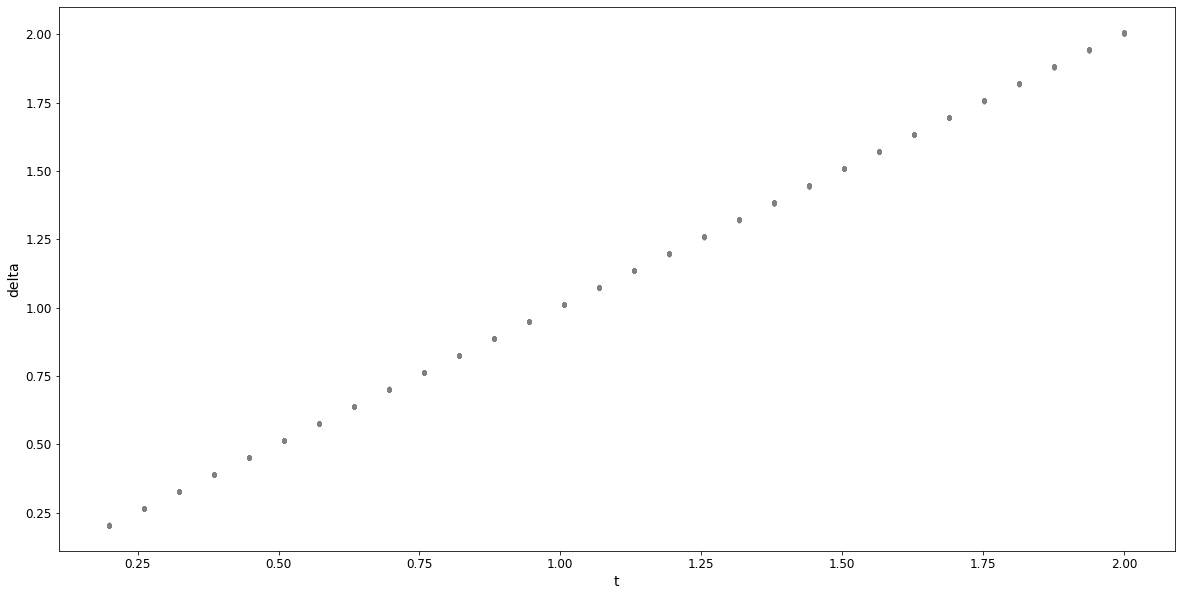

In [20]:
plt.rcParams["figure.figsize"] = (20,10)
plot_time("comparision_tests/logs/sleep_multi.txt")

### Sleep 0.2 - 0.3

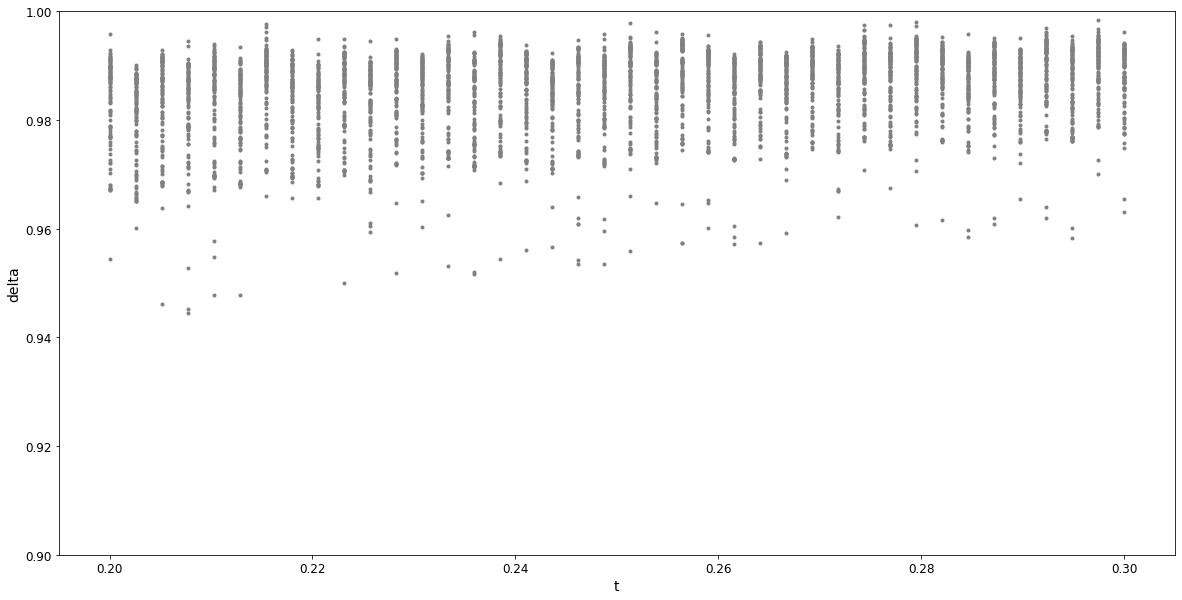

In [24]:
plt.rcParams["figure.figsize"] = (20,10)
plt.ylim(0.9,1.0)
plot_perf("comparision_tests/logs/sleep_multi-0.2-0.3.txt")

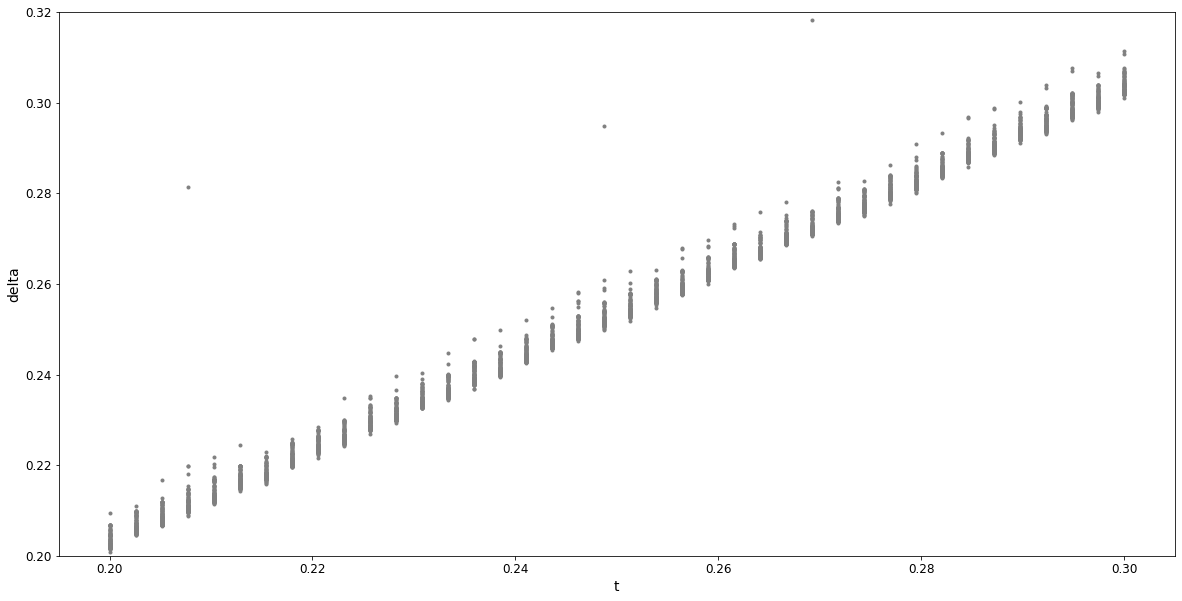

In [26]:
plt.rcParams["figure.figsize"] = (20,10)
plt.ylim(0.2,0.32)
plot_time("comparision_tests/logs/sleep_multi-0.2-0.3.txt")

### Sleep 0.2 - 0.205

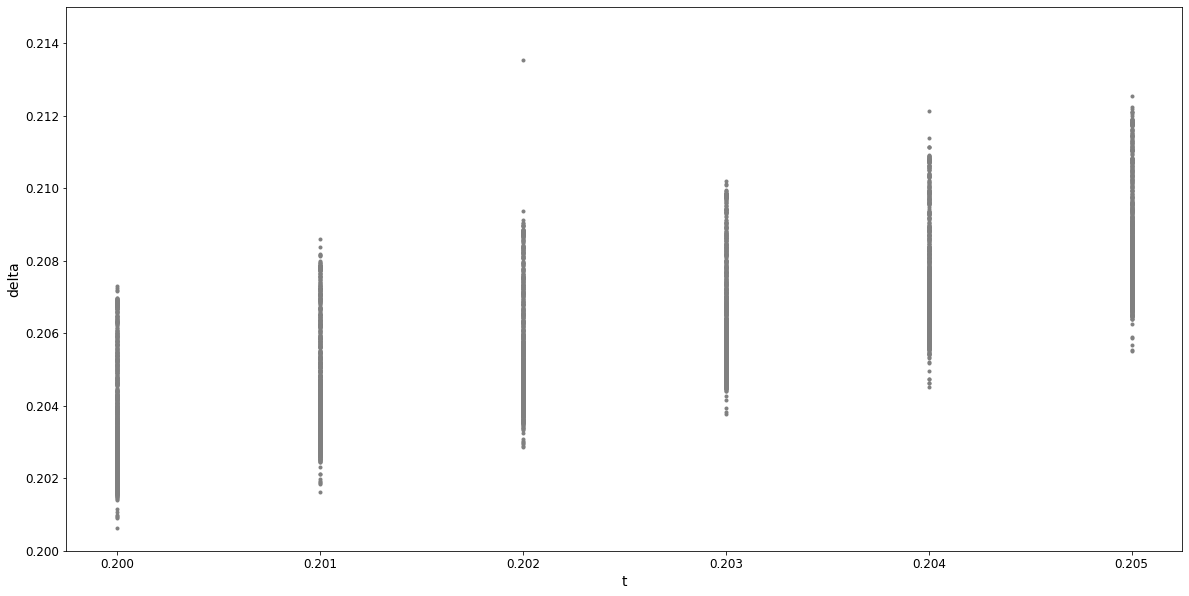

In [30]:
plt.rcParams["figure.figsize"] = (20,10)
plt.ylim(0.2,0.215)
plot_time("comparision_tests/logs/sleep_multi-0.2-0.205.txt")

In [32]:
def get_dict_for_hist(log):
    with open(log) as f:
        lines = f.readlines()
        d = {}
        for line in lines:
            k = float(line.split()[0])
            try:
                d[k].append(float(line.split()[1]))
            except KeyError:
                d[k] = []
                d[k].append(float(line.split()[1]))

    return d

In [34]:
d = get_dict_for_hist("comparision_tests/logs/sleep_multi-0.2-0.205.txt")

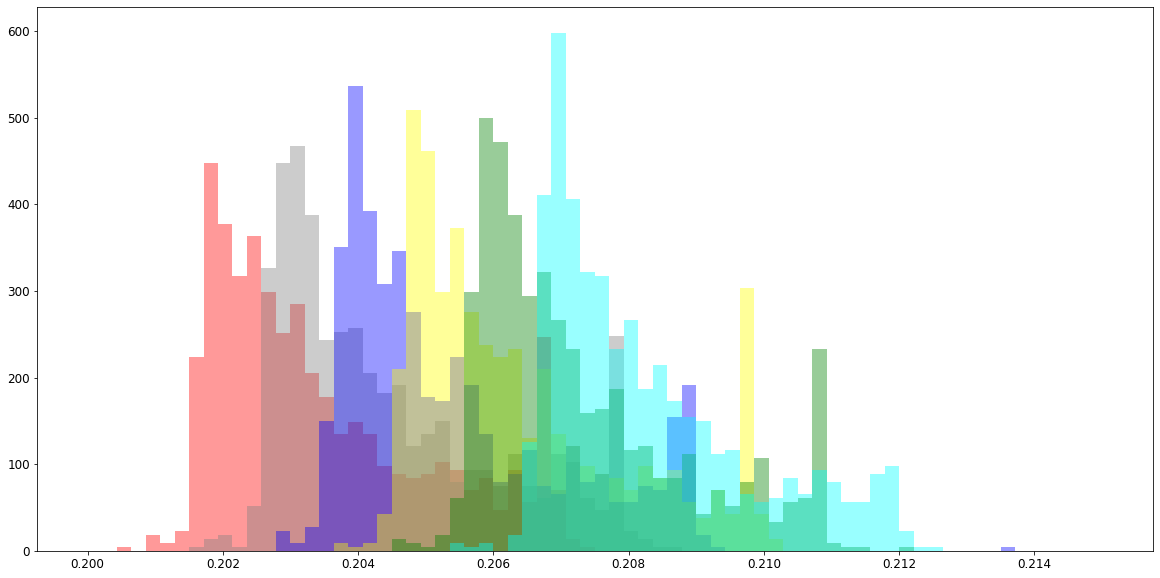

In [73]:
l=0.2
u=0.215
plt.hist(d[0.2],bins=70,color="red",density=True,range=(l,u),alpha=0.4)
plt.hist(d[0.201],bins=70,color="grey",density=True,range=(l,u),alpha=0.4)
plt.hist(d[0.202],bins=70,color="blue",density=True,range=(l,u),alpha=0.4)
plt.hist(d[0.203],bins=70,color="yellow",density=True,range=(l,u),alpha=0.4)
plt.hist(d[0.204],bins=70,color="green",density=True,range=(l,u),alpha=0.4)
plt.hist(d[0.205],bins=70,color="cyan",density=True,range=(l,u),alpha=0.4)
plt.show()

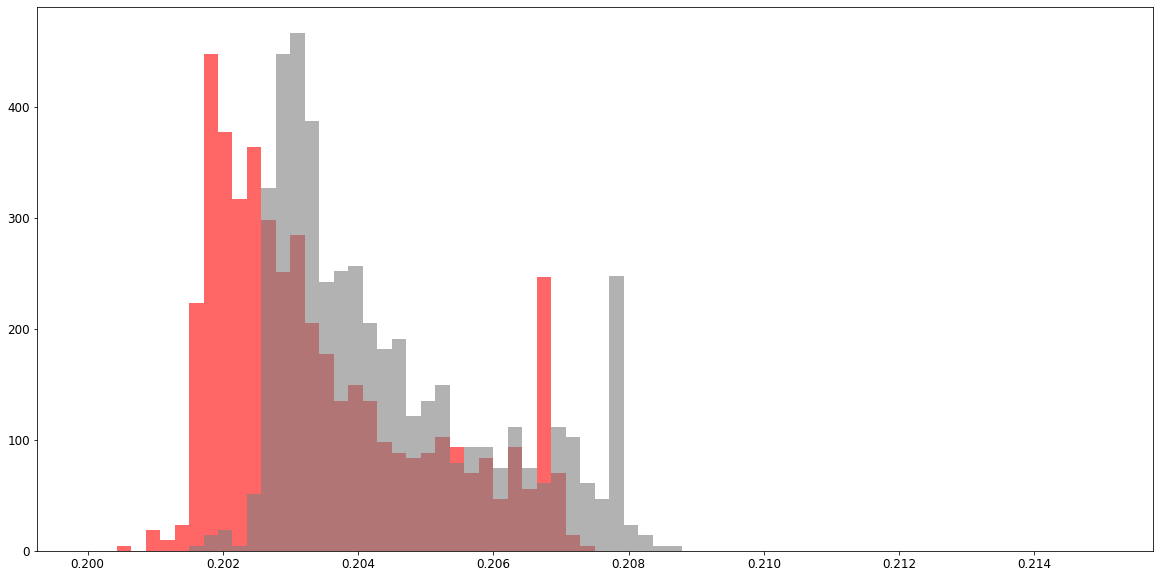

In [68]:
plt.hist(d[0.2],bins=70,color="red",density=True,range=(l,u),alpha=0.6)
plt.hist(d[0.201],bins=70,color="grey",density=True,range=(l,u),alpha=0.6)
plt.show()

### Comparision Strategies

In [233]:
S = 20
K = 5
M = 10
THRESH = 0.60
stat = np.min

In [247]:
def PH1(d1,d2):
    N = 1000
    h1 = 0
    for i in range(N):
        A = random.sample(d1,S)
        B = random.sample(d2,S)
        c = 0
        for j in range(M):
            tA = stat(random.sample(A,K))
            tB = stat(random.sample(B,K))
            if tA < tB:
                c+=1
        c = float(c/M) #E[tA < tB]
        if c>THRESH: #E[tA < tB] > THRESH
            h1+= 1
    p_h1 = float(h1/N) #P(H1) = P(E[tA < tB] > THRESH) when M = 1 => P(H1) = E[tA < tB]
    return p_h1


### Different distributions

#### Strategy B

In [390]:
S = 20
K = 4
M = 10
THRESH = 0.51
stat = np.min
print("P(H1) = ", PH1(d[0.2],d[0.201]))

P(H1) =  0.992


#### Strategy A

In [364]:
S = 20
K = S
M = 1
THRESH = 0.51
stat = np.min
print("P(H1) = ", PH1(d[0.2],d[0.201]))

P(H1) =  0.99


### Same distribution

#### Strategy B

In [385]:
S = 20
K = 4
M = 10
THRESH = 0.60
stat = np.min
print("P(H1) = ", PH1(d[0.2],d[0.2]))

P(H1) =  0.259


#### Strategy A

In [256]:
S = 20
K = S
M = 1
THRESH = 0.60
stat = np.min
print("P(H1) = ", PH1(d[0.2],d[0.2]))

P(H1) =  0.501


### Same Distribution (Realistic)

In [269]:
d1 = get_dict_for_hist("comparision_tests/logs/sleep_multi-0.2-0.201.txt")

**min interval - 0.2, 0.201 - anything inbetween is rounded off**

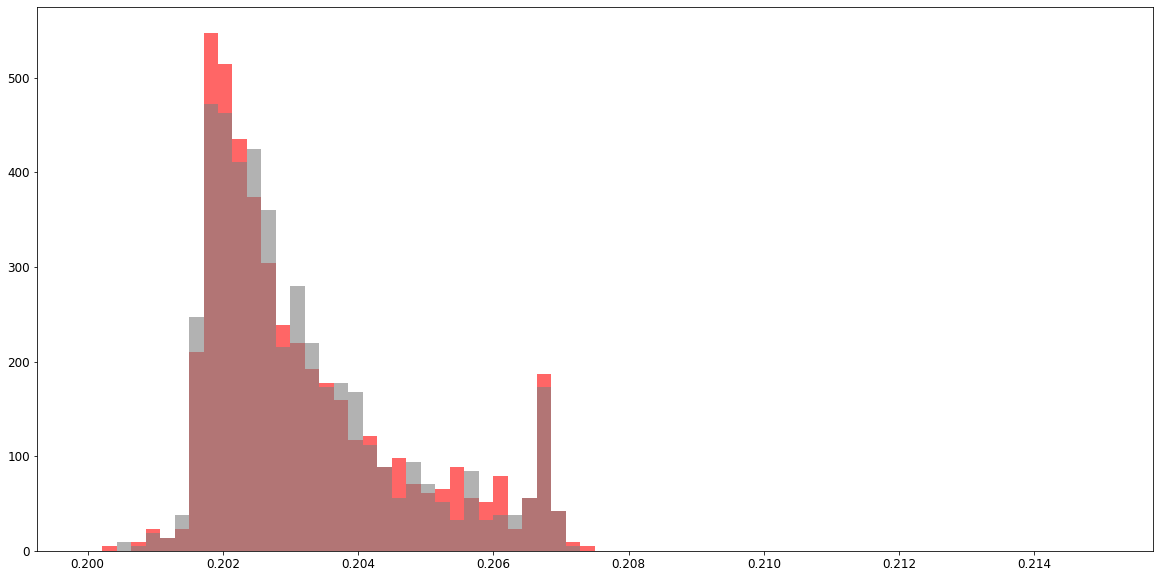

In [266]:
plt.rcParams["figure.figsize"] = (20,10)
plt.hist(d1[0.2],bins=70,color="red",density=True,range=(l,u),alpha=0.6)
plt.hist(d1[0.2005],bins=70,color="grey",density=True,range=(l,u),alpha=0.6)
plt.show()

#### Strategy B

In [306]:
S = 20
K = 1
M = 20
THRESH = 0.60
stat = np.min
print("P(H1) = ", PH1(d1[0.2],d1[0.2002]))

P(H1) =  0.148


#### Strategy A

In [268]:
S = 20
K = S
M = 1
THRESH = 0.60
stat = np.min
print("P(H1) = ", PH1(d1[0.2],d1[0.2002]))

P(H1) =  0.512
